<a href="https://colab.research.google.com/github/Tagore-7/Pytorch_Tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# convert mnist images files into tensor of 4 dimensions
# no of images, height, width, color channel

transform = transforms.ToTensor()

In [3]:
# train data

train_data = datasets.MNIST(root = "/cnn_data", train =True, download = True, transform= transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 88246604.97it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97926995.82it/s]

Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28576056.21it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21285507.00it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
test_data = datasets.MNIST(root = "/cnn_data", train =False, download = True, transform= transform)


In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# create a samll batch size
train_loader = DataLoader(train_data, batch_size= 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size= 10, shuffle = False)

In [8]:
# define cnn model
# describe conolutional layer and what it is doing
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [9]:
# grad 1 mnist record image
for i , (X_Train, y_train) in enumerate(train_data):
  break

In [10]:
X_Train.shape

torch.Size([1, 28, 28])

In [11]:
x = X_Train.view(1,1,28,28)

In [12]:
x = F.relu(conv1(x))

In [13]:
x.shape    # 1 is one image, 6 filters, 26 * 26 image

torch.Size([1, 6, 26, 26])

In [14]:
x = F.max_pool2d(x, 2, 2) # kernel 2 ans stride 2

In [15]:
x.shape # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [16]:
# second conv2
x = F.relu(conv2(x))

In [17]:
x.shape ## didn't set padding loosing 2 pixles outside

torch.Size([1, 16, 11, 11])

In [18]:
x = F.max_pool2d(x, 2, 2)

In [19]:
x.shape

torch.Size([1, 16, 5, 5])

In [20]:
## model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    ## Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  ## Forward pass
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2,2)

    X = X.view(-1,16*5*5)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim = 1)




In [21]:
torch.manual_seed(42)

model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
## loss function opitimzer
criterion = nn.CrossEntropyLoss()
opitmizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [23]:
from ast import withitem
import time
start_time = time.time()
# create variables to track things
epochs = 10
train_loss = []
test_loss = []
train_correct = []
test_correct = []
# for loop of epochs
for epoch in range(epochs):
  train_corr = 0
  test_corr = 0

    # Train
  for batch, (X_Train, y_train) in enumerate(train_loader):
    batch += 1
    y_pred = model(X_Train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    train_corr += batch_corr





     # update the params
    opitmizer.zero_grad()
    loss.backward()
    opitmizer.step()

     # print the results
    if batch % 600 ==0:
      print(f"Epoch:{epoch} Batch:{batch} Loss:{loss.item()}")

  train_loss.append(loss)
  train_correct.append(train_corr)


  # test
  with torch.no_grad():
    for batch, (X_Test, y_test) in enumerate(test_loader):
      y_val = model(X_Test)
      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_loss.append(loss)
  test_correct.append(test_corr)

current_time = time.time()
total = current_time - start_time
print(f"Training Took: {total / 60} minutes")

Epoch:0 Batch:600 Loss:0.007330802269279957
Epoch:0 Batch:1200 Loss:0.036377549171447754
Epoch:0 Batch:1800 Loss:0.9541753530502319
Epoch:0 Batch:2400 Loss:0.06135378032922745
Epoch:0 Batch:3000 Loss:0.014649903401732445
Epoch:0 Batch:3600 Loss:0.00014132658543530852
Epoch:0 Batch:4200 Loss:0.5087004899978638
Epoch:0 Batch:4800 Loss:0.045817781239748
Epoch:0 Batch:5400 Loss:0.004989025183022022
Epoch:0 Batch:6000 Loss:0.3284910023212433
Epoch:1 Batch:600 Loss:0.0010484460508450866
Epoch:1 Batch:1200 Loss:0.5946699976921082
Epoch:1 Batch:1800 Loss:0.00826119165867567
Epoch:1 Batch:2400 Loss:0.0017208419740200043
Epoch:1 Batch:3000 Loss:0.28423893451690674
Epoch:1 Batch:3600 Loss:0.001267873216420412
Epoch:1 Batch:4200 Loss:0.015317593701183796
Epoch:1 Batch:4800 Loss:0.005009133368730545
Epoch:1 Batch:5400 Loss:0.054441891610622406
Epoch:1 Batch:6000 Loss:0.35370832681655884
Epoch:2 Batch:600 Loss:0.008823515847325325
Epoch:2 Batch:1200 Loss:0.0030889040790498257
Epoch:2 Batch:1800 Loss

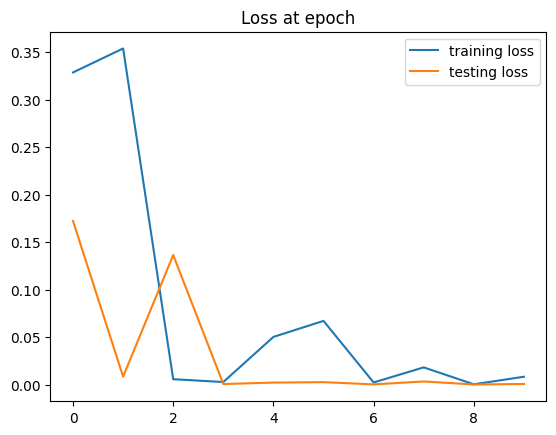

In [24]:
# graph the loss at each epoch
train_loss = [tl.item() for tl in train_loss]
plt.plot(train_loss, label = "training loss")
plt.plot(test_loss, label = "testing loss")
plt.title("Loss at epoch")
plt.legend()

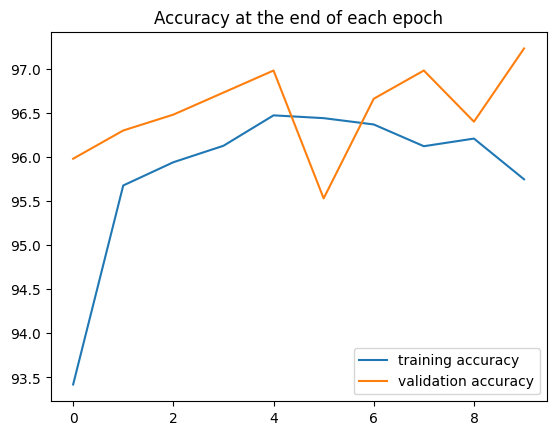

In [25]:
# plot the accuracy

plt.plot([t/600 for t in train_correct], label = "training accuracy")
plt.plot([t/100 for t in test_correct], label = "validation accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [26]:
test_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)
with torch.no_grad():
  correct = 0
  for X_Test, y_test in test_everything:
    y_val = model(X_Test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

correct.item()/ len(test_data) * 100

97.23

In [26]:
# run the image through cnn and test it
# gran an image

test_data[4103]

In [27]:
# grab just the image
test_data[4103][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [28]:
# reshape
test_data[4103][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

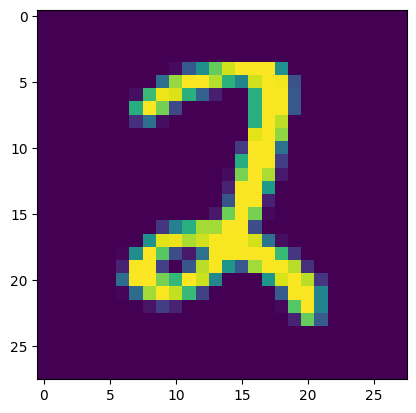

In [29]:
plt.imshow(test_data[4103][0].reshape(28,28))

In [30]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4103][0].view(1,1,28,28))

In [31]:
new_prediction.argmax()

tensor(2)